In [10]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [11]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [12]:
data = pd.read_json(x_src_path)


In [13]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [14]:
# X = np.array(X_flattened_padded)
X = data.values
y = plagiarised_array

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=32)
#seed 32 results 100% on test score

In [17]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 1.0


c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


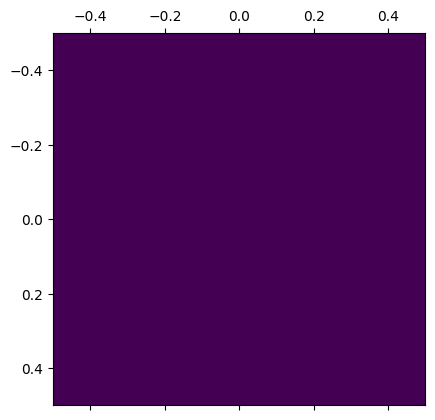

In [18]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)